In [12]:
import cv2
import wget
from color_util import *
from color_cluster import* 
from color_pop_util import *
from skimage.color import deltaE_cie76,lab2rgb
from skimage import io
import numpy as np
import pandas as pd
import time
from colour import hsl2rgb

In [2]:
hsl_cat=np.zeros((6,5,5))

In [19]:
hue=[[330,30],[30,90],[90,150],[150,210],[210,270],[270,330]]
satuation=[[0,20],[20,40],[40,60],[60,80],[80,100.1]]
lightness=[[0,20],[20,40],[40,60],[60,80],[80,100.1]]

hue_value=[0,60,120,180,240,300]
satuation_value=[10,30,50,70,90]
lightness_value=[10,30,50,70,90]

In [133]:
image=cv2.imread("../marcc/scraping_image_project/crop_image/21395700.jpg")

In [328]:

,color=color_rgb[c]
from colour import Color

In [4]:
def rgb2hsl(pix):
    pix=np.asarray(pix)/255.
    pixcolor=Color(rgb=pix)
    hsl=pixcolor.hsl
    color_hsl=np.zeros(3)
    color_hsl[0]=hsl[0]*360
    color_hsl[1]=hsl[1]*100
    color_hsl[2]=hsl[2]*100
    return color_hsl

In [134]:
# after prepare image
image=prepare_image(image).astype('uint8')

hsl_cat=np.zeros((6,5,5))

for i in range(image.shape[0]):
    pix_hsl=rgb2hsl(image[i])
    for i in range(1,6):
        if pix_hsl[0]>=hue[i][0] and pix_hsl[0]<hue[i][1]:
            pix_h=i
    if pix_hsl[0]>=330 or pix_hsl[1]<30:
            pix_h=0
    for i in range(5):
        if pix_hsl[1]>=satuation[i][0] and pix_hsl[1]<satuation[i][1]:
            pix_s=i
        if pix_hsl[2]>=lightness[i][0] and pix_hsl[2]<lightness[i][1]:
            pix_l=i
    hsl_cat[pix_h,pix_s,pix_l]+=1



In [143]:
image[12284//2]

array([80, 70, 61], dtype=uint8)

In [139]:
np.where(hsl_cat==1.0730e+03)

(array([0]), array([0]), array([2]))

In [67]:
order=np.argsort(hsl_cat.reshape(150))[::-1]
rank_index=[]
for o in order:
    i1=o//25
    i2=(o%25)//5
    i3=(o%25)%5
    rank_index.append([i1,i2,i3])

In [71]:
hsl_cat[3, 2, 2]

0.0

In [74]:
#rank_index
image

array([[121,  65, 125],
       [160, 102, 165],
       [136,  76, 141],
       ...,
       [144, 136, 137],
       [182, 173, 171],
       [179, 172, 169]], dtype=uint8)

In [76]:
Color(rgb=image[3]/255)

<Color #b174b6>

In [77]:
image[3]

array([177, 116, 182], dtype=uint8)

In [81]:
hsl2rgb?


In [345]:
color_hsl_df=pd.read_csv("../marccc/scraping_image_project/image_pop_color_hsl/pop_color_0.csv")
color_hsl_df.drop(columns="Unnamed: 0",inplace=True)

In [346]:
color_hsl_df

,project_id,time,0,1,2,3,4,5,6,7,...,140,141,142,143,144,145,146,147,148,149
0,21352836,2018/03/12,466.0,2237.0,659.0,118.0,9.0,12.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3990231,2010/05/12,0.0,39.0,2599.0,3614.0,0.0,55.0,114.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8802471,2012/08/22,0.0,73.0,247.0,28.0,0.0,17.0,1513.0,7261.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21395700,2018/03/19,277.0,1650.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4293173,2010/07/25,0.0,4.0,54.0,20.0,1.0,0.0,2.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#color_count=(color_hsl_df.drop(columns=['project_id','time'])).iloc[2]
#color_count=np.asarray(frequency)
color_count=np.arange(150)
for i in range(150):
    color_count[i]=frequency[i]

In [23]:
color_order=np.argsort(color_count)[::-1]
color_rank_rgb=[]
for i in color_order:
    i1,i2,i3=oneD_to_3D_index(i)
    color_hsl=np.asarray([hue_value[i1]/360.,satuation_value[i2]/100.,lightness_value[i3]/100.])
    color_rgb=np.asarray(hsl2rgb(color_hsl))
    #print(color_rgb*255)
    #blue=color_rgb[0]
    #color_rgb[0]=color_rgb[2]
    #color_rgb[2]=blue
    color_rank_rgb.append(color_rgb)
    

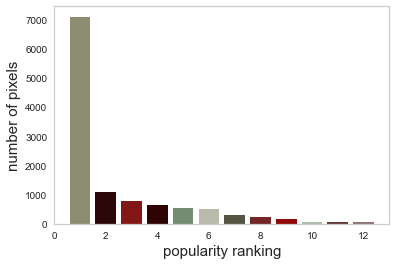

In [24]:
for i in range(12):
    plt.bar([i+1],[color_count[color_order[i]]],color=color_rank_rgb[i])
plt.xlabel("popularity ranking",fontsize=15)
plt.ylabel("number of pixels",fontsize=15)
plt.grid("false")

In [280]:
#plt.bar([i],[color_count[color_order[i]]],color=np.array([165.75 , 89.25 , 89.25])/255.)

In [215]:
hsl2rgb((0,0.5,0.5))

(0.75, 0.25, 0.25)

In [26]:
color_order

array([ 27,  15,  16,  20,  52,  28,  26,  11,  21,  53,   6,   2,  51,
        77,  40,  10,  31,  78,   7,   1, 127,  12, 102,  35,  76,   3,
        25, 103,  50,  45,  30, 128,  32,  55, 149,  54,  49,  56,  61,
        57,  58,  59,  60,  47,  62,  63,  64,  65,  66,  67,  68,  48,
        36,  46,  23,   4,   5,   8,   9,  13,  14,  17,  18,  19,  22,
        24,  44,  29,  33,  34,  70,  37,  38,  39,  41,  42,  43,  69,
        74,  71, 121, 129, 126, 125, 124, 123, 122, 120, 131, 119, 118,
       117, 116, 115, 114, 130, 132, 112, 141, 147, 146, 145, 144, 143,
       142, 140, 133, 139, 138, 137, 136, 135, 134, 113, 111,  72,  83,
        89,  88,  87,  86,  85,  84,  82,  91,  81,  80,  79,  75, 148,
        73,  90,  92, 110, 101, 109, 108, 107, 106, 105, 104, 100,  93,
        99,  98,  97,  96,  95,  94,   0])

In [5]:
x=cv2.imread("/Users/yajinghuang/Desktop/insight/project_ideas/marc/crop_image/4612394.jpg")
#x=prepare_image(x)
#

In [242]:
prepare_image(flip_rgb(x))[x.shape[0]//2]

array([136,  75,  74], dtype=uint8)

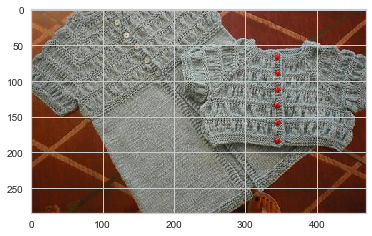

In [21]:
plt.imshow(flip_rgb(x))

In [383]:
#image_pop_color(flip_rgb(x),8802471)

In [256]:
color=pd.read_csv('rgb.txt')

In [325]:
color.iloc[86]

colorname#hexcode    charcoal grey\t#3c4142\t
Name: 86, dtype: object

In [269]:
color_rank_rgb[0]

array([0.35, 0.35, 0.65])

In [20]:
#image=cv2.imread("/Users/yajinghuang/Downloads/21395700.jpg")
hue=[[330,30],[30,90],[90,150],[150,210],[210,270],[270,330]]
satuation=[[0,20],[20,40],[40,60],[60,80],[80,100]]
lightness=[[0,20],[20,40],[40,60],[60,80],[80,100]]
image=flip_rgb(x)
hsl_cat=np.zeros((6,5,5))
image=(prepare_image(image).astype('uint8'))
red=0
blue=0
for i in range(image.shape[0]):
    pix_hsl=rgb2hsl(image[i])
    if image[i][0]>image[i][2]:
        red+=1
    else: blue+=1
    #print(image[i],pix_hsl)
    for i in range(1,6):
        if pix_hsl[0]>=hue[i][0] and pix_hsl[0]<hue[i][1]:
            pix_h=i
    if pix_hsl[0]>=330 or pix_hsl[0]<30:
            pix_h=0
    for i in range(5):
        if pix_hsl[1]>=satuation[i][0] and pix_hsl[1]<satuation[i][1]:
            pix_s=i
        if pix_hsl[2]>=lightness[i][0] and pix_hsl[2]<lightness[i][1]:
            pix_l=i
    hsl_cat[pix_h,pix_s,pix_l]+=1
    #print([pix_h,pix_s,pix_l])
color_cat_flat=hsl_cat.reshape(150)
frequency={}
for i in range(150):
    frequency[i]=color_cat_flat[i]

In [374]:
#frequency

    for i in range(image.shape[0]):
        pix_hsl=rgb2hsl(image[i])
        #print(image[i],pix_hsl)
        for i in range(1,6):
            if pix_hsl[0]>=hue[i][0] and pix_hsl[0]<hue[i][1]:
         #       print('h',hue[i])
                pix_h=i
        if pix_hsl[0]>=330 or pix_hsl[0]<30:
          #      print('red')
                pix_h=0
        #print(pix_hsl)
        for i in range(5):
            if pix_hsl[1]>=satuation[i][0] and pix_hsl[1]<satuation[i][1]:
                pix_s=i
           #     print('s',satuation[i])
            if pix_hsl[2]>=lightness[i][0] and pix_hsl[2]<lightness[i][1]:
                pix_l=i
            #    print('l',lightness[i])
        hsl_cat[pix_h,pix_s,pix_l]+=1

In [342]:
blue

3751

In [276]:
o=7
i1=o//25
i2=(o%25)//5
i3=(o%25)%5
print(i1,i2,i3)

0 1 2


In [331]:
rgb2hsl((60,65,66))

array([190.        ,   4.76190476,  24.70588235])